<a href="https://colab.research.google.com/github/msboralugoda/Pattern-Recognition/blob/main/EN3150_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Linear regression impact on outliers

Least Squares (sklearn): y = -3.557x + 3.917


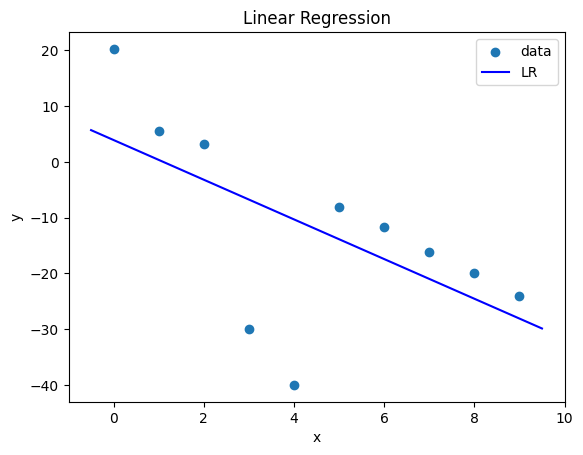

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
x = np.array([0,1,2,3,4,5,6,7,8,9], dtype=float)
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03], dtype=float)

# Fit LS model
lr = LinearRegression().fit(x.reshape(-1,1), y)
a_ls = lr.coef_[0]
b_ls = lr.intercept_
print(f"Least Squares (sklearn): y = {a_ls:.3f}x + {b_ls:.3f}")

# Plot
xs = np.linspace(x.min()-0.5, x.max()+0.5, 300)
plt.scatter(x, y, label="data")
plt.plot(xs, a_ls*xs + b_ls,color="blue", label="LR")

plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.title("Linear Regression")
plt.show()

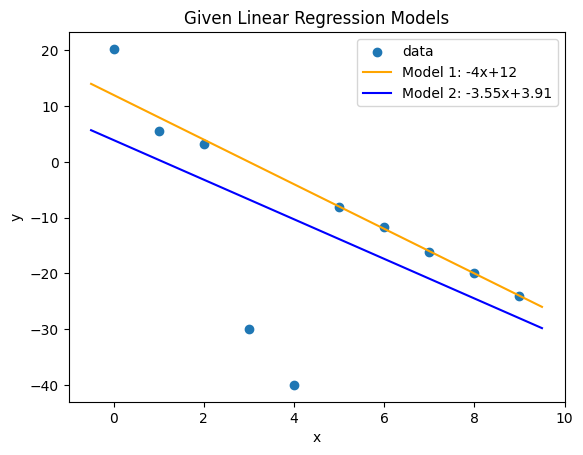

In [10]:
plt.scatter(x, y, label="data")

# Given two models
def m1(x): return -4*x + 12
def m2(x): return -3.55*x + 3.91

# Plot the given models
plt.plot(xs, m1(xs), color="orange",label="Model 1: -4x+12")
plt.plot(xs, m2(xs), color="blue",label="Model 2: -3.55x+3.91")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.title("Given Linear Regression Models")
plt.show()

In [13]:
import numpy as np

def robust_loss(y_true, y_pred, beta):
    r2 = (y_true - y_pred)**2
    return np.mean(r2 / (r2 + beta**2))

betas = [1.0, 1e-6, 1e3]
yhat_m1 = m1(x)
yhat_m2 = m2(x)

for beta in betas:
    L1 = robust_loss(y, yhat_m1, beta)
    L2 = robust_loss(y, yhat_m2, beta)
    print(f"beta={beta:g}")
    print(f"L(Model1)={L1:.6f}  L(Model2)={L2:.6f}")


beta=1
L(Model1)=0.435416  L(Model2)=0.972847
beta=1e-06
L(Model1)=1.000000  L(Model2)=1.000000
beta=1000
L(Model1)=0.000227  L(Model2)=0.000188


Task 5

The suitable β value to mitigate the impact of the outliers: 1

Justification:

β = 1 provides the optimal balance in the given robust loss function. When β = 1, small residuals contribute propotionally to loss which maintains the model sensitivity, while large residuals are capped at approximately 1 which limits the outlier influence.

The alternatives fail to achieve this balance. β = 10⁻⁶ makes all non-zero residuals contribute equally. This eliminates the ability to distinguish berween good and poor fits. β = 10³ uniformly down-weights all residuals. This reduces model's learning capacity.

β = 1 ensures that extreme outliers in the dataset contribute at most 1.0 to the total loss, preventing them from dominating parameter estimation while preserving the model's responsiveness to the majority of well-behaved data points.


Task 6

The most suitable model when β = 1 : Model 1(y = -4x + 12)

Justification:
Model 1 has a significantly lower robust loss(0.435416) which indicates that it provides a beter fit to the data set when outlier influence is controlled by β = 1.

This result shows that while Model 2 may have been derived from standard linear regression on the full dataset, Model 1's parameters are more robust to the presence of outliers. The robust evaluation reveals that Model 1 better captures the true linear relationship in the data without being overly influenced by the outliers, making it the best choice for reliable predictions on this dataset.

Task 7



True y  y_hat     MSE         BCE
     1  0.005    0.990025    5.298317
     1  0.010    0.980100    4.605170
     1  0.050    0.902500    2.995732
     1  0.100    0.810000    2.302585
     1  0.200    0.640000    1.609438
     1  0.300    0.490000    1.203973
     1  0.400    0.360000    0.916291
     1  0.500    0.250000    0.693147
     1  0.600    0.160000    0.510826
     1  0.700    0.090000    0.356675
     1  0.800    0.040000    0.223144
     1  0.900    0.010000    0.105361
     1  1.000    0.000000   -0.000000


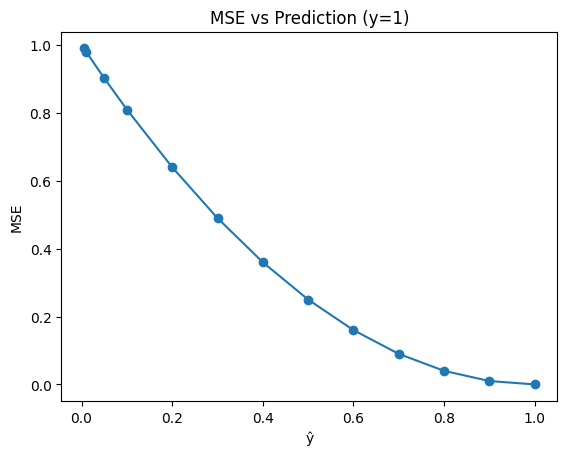

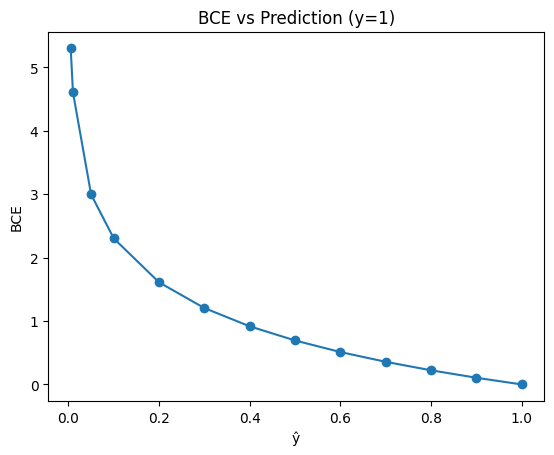

In [18]:
import numpy as np
import matplotlib.pyplot as plt

y_true = 1.0
yhat = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                 0.6, 0.7, 0.8, 0.9, 1.0], dtype=float)

# MSE
mse = (y_true - yhat)**2

# BCE
eps = 1e-12
bce = -np.log(np.clip(yhat, eps, 1.0))

print("True y  y_hat     MSE         BCE")
for yh, m, b in zip(yhat, mse, bce):
    print(f"{1:6d}  {yh:0.3f}  {m:10.6f}  {b:10.6f}")

# Plots
plt.plot(yhat, mse, marker='o')
plt.xlabel("ŷ"); plt.ylabel("MSE"); plt.title("MSE vs Prediction (y=1)")
plt.show()

plt.plot(yhat, bce, marker='o')
plt.xlabel("ŷ"); plt.ylabel("BCE"); plt.title("BCE vs Prediction (y=1)")
plt.show()


For Application 1 (continuous dependent variable), the best choice is Mean Squared Error (MSE). MSE finds the average of the squared differences between actual and predicted values. Squaring makes large errors count more, so the model tries to keep every prediction as close as possible to the true value. This works well for regression problems because the outputs are real numbers, and the aim is to predict them accurately.

For Application 2 (binary dependent variable), the best choice is Binary Cross-Entropy (BCE).BCE measures how close the predicted probability
𝑦_hat is to the correct class. It gives a small loss if the model is confident and correct, but a very large loss if it is confident and wrong. This is exactly what we want in classification, especially in logistic regression, because it encourages the model to give high probabilities for the correct class and low probabilities for the wrong one.


## 3 Data pre-processing

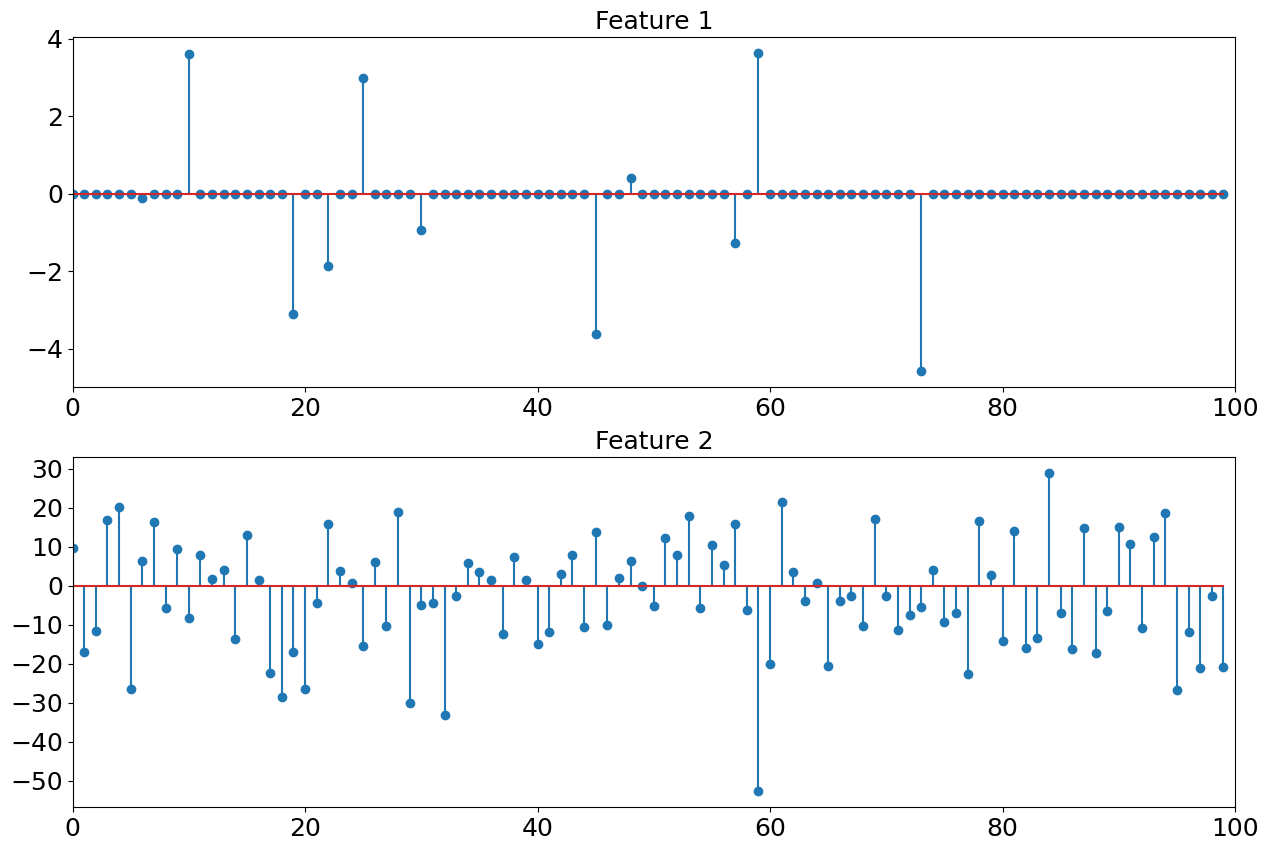

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):

  signal = np.zeros(signal_length)
  nonzero_indices = np.random.choice(signal_length, num_nonzero,
  replace=False)
  nonzero_values = 10*np.random.randn(num_nonzero)
  signal[nonzero_indices] = nonzero_values

  return signal

signal_length = 100 # Total length of the signal
num_nonzero = 10 # Number of non-zero elements in the signal
your_index_no= 220074
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10)*2 + 10

if your_index_no % 10 == 0:
  sparse_signal[10] = np.random.randn(1) + 30
sparse_signal=sparse_signal/5
epsilon = np.random.normal(0, 15, signal_length )


#epsilon=epsilon[:, np.newaxis]
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.show()

Choosing suitable scaling methods

Feature 1 - MaxAbsScaler

Feature 1 is a sparse signal, meaning most of its values are exactly zero, with only a few non-zero spikes. When scaling such data, it is important to:

  1. Keep zeros exactly at zero.

  2. Preserve the relative magnitude and sign of the spikes.

The MaxAbsScaler scales each value by dividing by the maximum absolute value in the feature. This ensures that all values fall within
[−1,1] while leaving zeros untouched. Unlike StandardScaler, it does not shift the mean which would destroy sparsity by turning zeros into small non-zero values. Unlike MinMaxScaler, it does not force all values into [0,1], which would lose sign information and distort the structure.

Because of these properties, MaxAbsScaler is the most suitable scaling method for Feature 1 as it normalizes the range without altering the zero structure or the proportion between spike amplitudes.

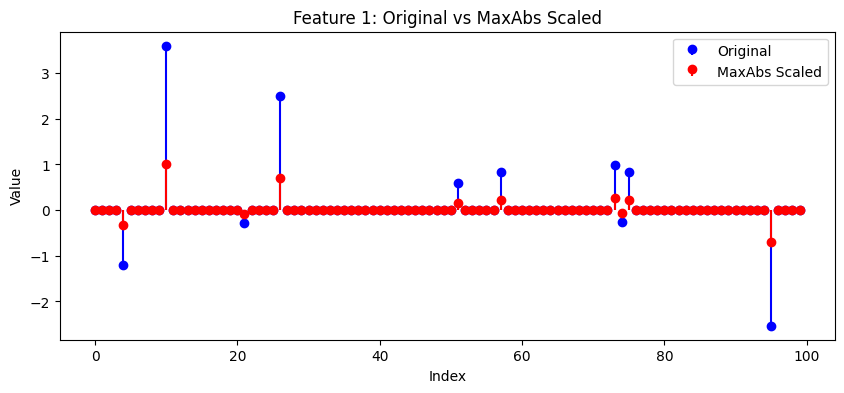

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler

# Generate Feature 1 (same as assignment code)
def generate_signal(signal_length, num_nonzero):
    sig = np.zeros(signal_length)
    idx = np.random.choice(signal_length, num_nonzero, replace=False)
    sig[idx] = 10 * np.random.randn(num_nonzero)
    return sig

signal_length = 100
num_nonzero = 10
your_index_no = 220074

f1 = generate_signal(signal_length, num_nonzero)
val10 = (your_index_no % 10) * 2 + 10
if (your_index_no % 10) == 0:
    val10 = np.random.randn(1) + 30
f1[10] = val10
f1 = f1 / 5.0

# Apply MaxAbsScaler
scaler = MaxAbsScaler()
f1_scaled = scaler.fit_transform(f1.reshape(-1, 1)).ravel()

# Plot original vs scaled
plt.figure(figsize=(10,4))
plt.stem(f1, linefmt='b-', markerfmt='bo', basefmt=' ', label="Original")
plt.stem(f1_scaled, linefmt='r-', markerfmt='ro', basefmt=' ', label="MaxAbs Scaled")
plt.title("Feature 1: Original vs MaxAbs Scaled")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


The plot shows that applying MaxAbsScaler to Feature 1 leaves all zero values unchanged, preserving the sparsity of the signal. The non-zero spikes are scaled proportionally so that the largest absolute spike is normalized to ±1, while smaller spikes keep their relative sizes. The overall pattern and sign of the spikes remain intact, ensuring that the structure of the original feature is fully preserved after scaling.

Feature 2 - StandardScaler

Feature 2 is generated as Gaussian-like random noise with a mean close to zero but a relatively large standard deviation. For this type of feature, the important property to preserve is the distribution’s shape while normalizing its scale so it does not dominate other features in magnitude. The StandardScaler transforms the data to have zero mean and unit variance, which keeps the Gaussian shape and relative distances between points intact. Unlike MinMaxScaler, it does not compress the distribution into [0,1], and unlike MaxAbsScaler, it also removes mean offset. This makes it ideal for Gaussian-like data.


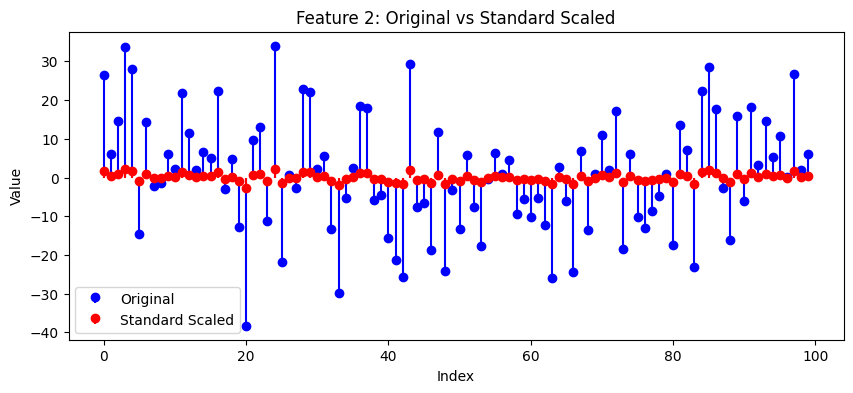

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate Feature 2
signal_length = 100
np.random.seed(0)
f2 = np.random.normal(0, 15, signal_length)

# Apply StandardScaler
scaler = StandardScaler()
f2_scaled = scaler.fit_transform(f2.reshape(-1, 1)).ravel()

# Plot original vs scaled
plt.figure(figsize=(10,4))
plt.stem(f2, linefmt='b-', markerfmt='bo', basefmt=' ', label="Original")
plt.stem(f2_scaled, linefmt='r-', markerfmt='ro', basefmt=' ', label="Standard Scaled")
plt.title("Feature 2: Original vs Standard Scaled")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


The plot shows that after applying StandardScaler, Feature 2 is transformed to have a mean of zero and a standard deviation of one, while its overall shape and variation pattern are preserved.The red scaled signal retains the same peak and trough positions as the original blue signal, meaning the pattern of variation is preserved. Only the magnitude is adjusted, preventing large values from dominating the learning process while keeping the underlying Gaussian-like distribution intact.